In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [4]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
iris.rename(columns = {'SepalLengthCm' : "sepal_length",
                      'SepalWidthCm': 'sepal_width',
                      'PetalLengthCm': 'petal_length',
                      'PetalWidthCm': 'petal_width'},
           inplace = True)

In [8]:
iris.columns

Index(['Id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Species'],
      dtype='object')

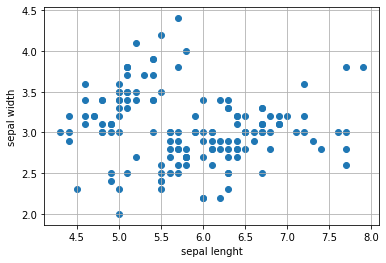

In [10]:
plt.scatter(x ='sepal_length', y = 'sepal_width', data=iris)
# plt.scatter(iris.sepal_length, iris.sepal_width)
plt.xlabel('sepal lenght')
plt.ylabel('sepal width')
plt.grid()

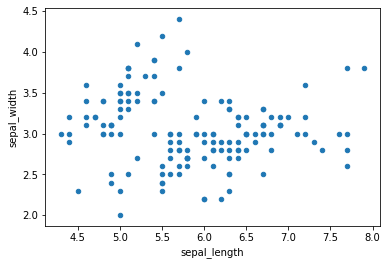

In [12]:
iris.plot(x ='sepal_length', y = 'sepal_width', kind='scatter')
# plt.grid()

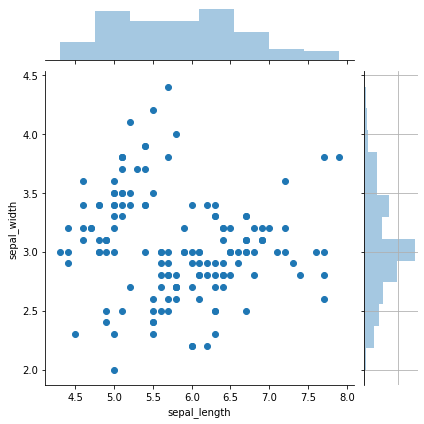

In [36]:
# plt.figure(figsize=(20,5))
sns.jointplot(x ='sepal_length', y = 'sepal_width',data = iris)
plt.grid()

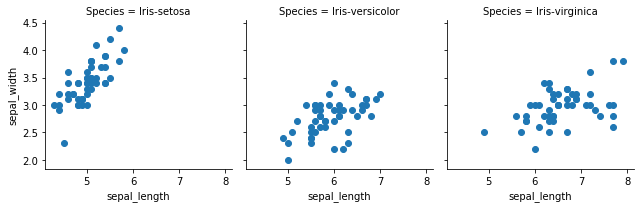

In [13]:
sns.set_style("whitegrid")
g = sns.FacetGrid(iris,col='Species')
g = g.map(plt.scatter, 'sepal_length', 'sepal_width')

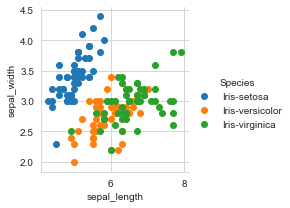

In [39]:
# plt.figure(figsize=(20,5))
sns.set_style("whitegrid")
sns.FacetGrid(data=iris, hue="Species").map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

Observation:
1. Using sepal_length and sepal_width we can distinguish Setosa flower from others
2. Separationg versicolor form virginica  is much harder to as they have considerable overlap


In [42]:
iris.drop('Id', axis=1, inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


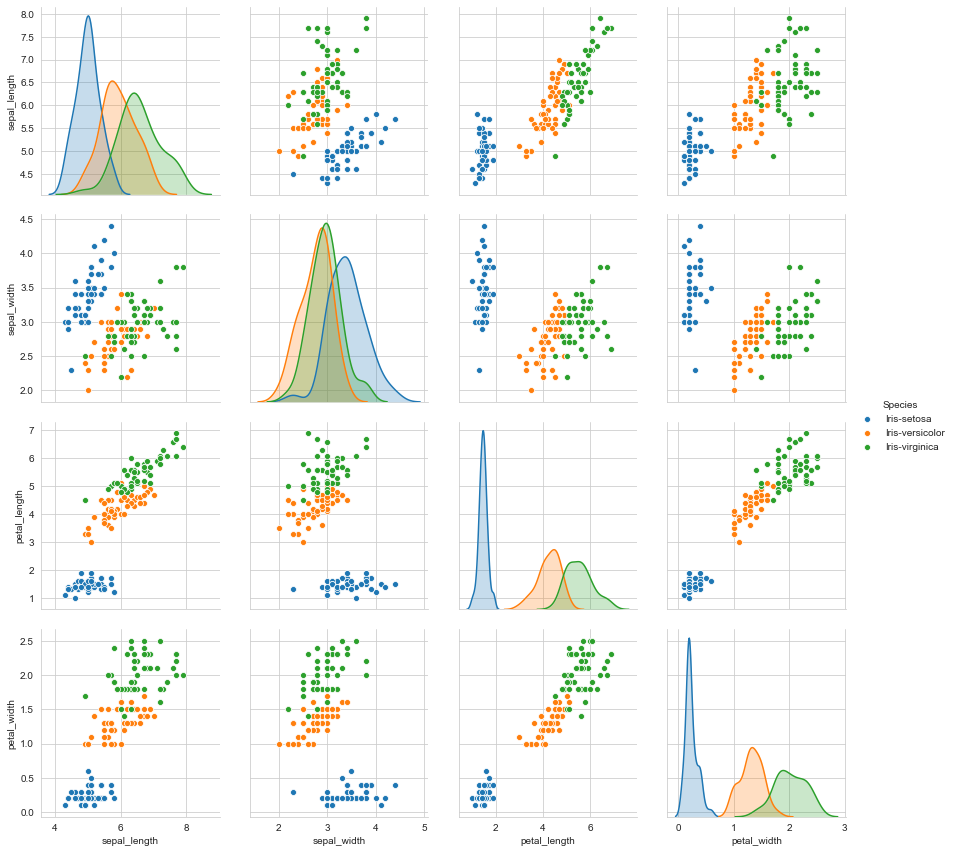

In [43]:
sns.pairplot(iris, hue='Species', height=3)

# Observation
1. petal_length and petal_width are the most useful features to identify various flower types
2. While Setosa can be easily identified(linearly separable), virginica and versicolor have some overlap(almost linearly separable)
3. We can find 'lines' and 'if-else' condition to build a simple model to classify the flower types

In [47]:
iris_setosa = iris.loc[iris['Species']=='Iris-setosa']
iris_versicolor = iris.loc[iris['Species']=='Iris-versicolor']
iris_virginica = iris.loc[iris['Species']=='Iris-virginica']
iris_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


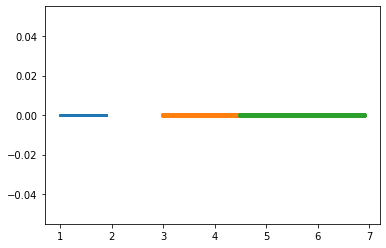

In [17]:
# what about 1-D scatter plot with just one feature.
# 1 - D scatter plot of petal-length
plt.plot(iris_setosa['petal_length'],np.zeros_like(iris_setosa['petal_length']), linewidth=3)
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length']),linewidth=5)
plt.plot(iris_virginica['petal_length'],np.zeros_like(iris_virginica['petal_length']),linewidth=5)
# Disadvantage of 1-D scatter plot is very hard to make sense as point are overlapping a lot


# Histogram and PDF

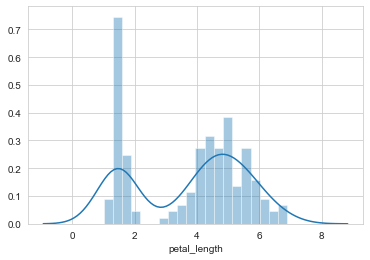

In [45]:
# iris[iris['Species']=='Iris-virginica'].head()
sns.distplot(iris['petal_length'], bins=20) 

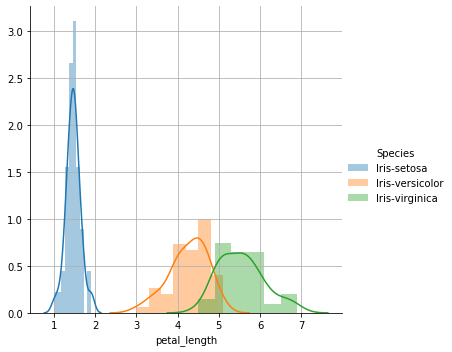

In [19]:
sns.FacetGrid(iris, hue="Species", height=5).map(sns.distplot, "petal_length").add_legend()
plt.grid()
# density plot

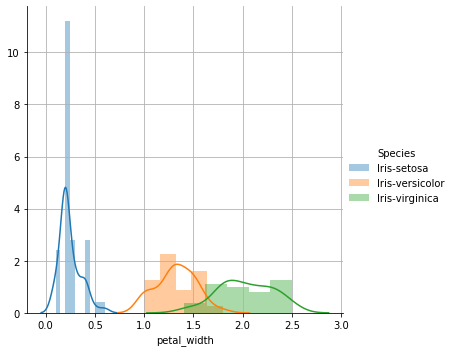

In [20]:
sns.FacetGrid(iris,hue="Species", height=5).map(sns.distplot,"petal_width").add_legend()
plt.grid()
# density plot

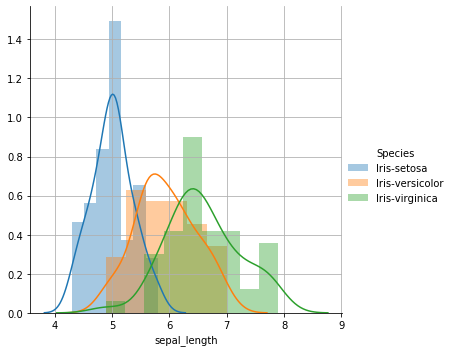

In [21]:
sns.FacetGrid(iris,hue="Species", height=5).map(sns.distplot,"sepal_length").add_legend()
plt.grid()
# density plot

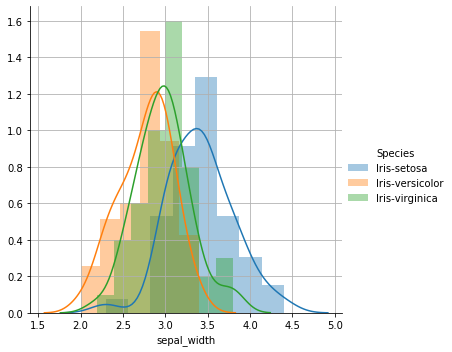

In [22]:
sns.FacetGrid(iris,hue="Species", height=5).map(sns.distplot,"sepal_width").add_legend()
plt.grid()
# density plot

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


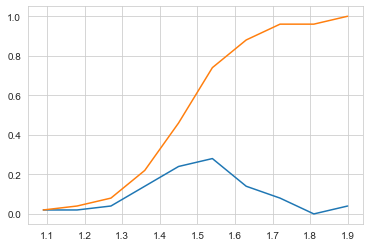

In [55]:
# CDF
# plot cdf of petal length

counts, bin_edge = np.histogram(iris_setosa['petal_length'], bins = 10)
pdf = counts/sum(counts)
print(pdf)
print(bin_edge)

# cdf
cdf = np.cumsum(pdf)
plt.plot(bin_edge[1:], pdf)
plt.plot(bin_edge[1:],cdf)
plt.show()



In [23]:
np.mean(iris_setosa['petal_length'])

1.464

In [24]:
iris_setosa['petal_length'].mean()

1.464

In [25]:
# Mean and standard deviation of all the three type of flower
print('\nMean')
print(iris_setosa['petal_length'].mean())
print(iris_versicolor['petal_length'].mean())
print(iris_virginica['petal_length'].mean())
print()
print('\nStandard Deviation')
print(iris_setosa['petal_length'].std())
print(iris_versicolor['petal_length'].std())
print(iris_virginica['petal_length'].std())


Mean
1.464
4.26
5.5520000000000005


Standard Deviation
0.17351115943644546
0.46991097723995795
0.5518946956639834


In [26]:
print('\nMedian')
print(iris_setosa['petal_length'].median())
print(iris_versicolor['petal_length'].median())
print(iris_virginica['petal_length'].median())
# other way
print()
print(np.median(iris_setosa['petal_length']))
print(np.median(iris_virginica['petal_length']))
print(np.median(iris_versicolor['petal_length']))


Median
1.5
4.35
5.55

1.5
5.55
4.35


In [27]:
print('\nQuantile')
print(np.percentile(iris_setosa['petal_length'],np.arange(0,100,25)))
print(np.percentile(iris_versicolor['petal_length'],np.arange(0,100,25)))
print(np.percentile(iris_virginica['petal_length'],np.arange(0,100,25)))
print()
print('\n 90 Percentile')
print(np.percentile(iris_setosa['petal_length'],90))
print(np.percentile(iris_versicolor['petal_length'],90))
print(np.percentile(iris_virginica['petal_length'],90).round(2))


Quantile
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]


 90 Percentile
1.7
4.8
6.31


# BOX plot Whiskers

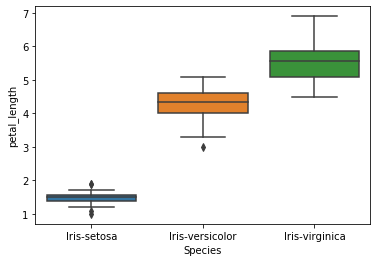

In [28]:
sns.boxplot(x='Species', y='petal_length', data=iris)
#Box-Plot with wiskers: Another method of visualising the 1-D scatter plot
#In the plot below: a technique called inter-quartile range is used
#Wishkers in the plot do not correspond to the min and max value


# violin plot

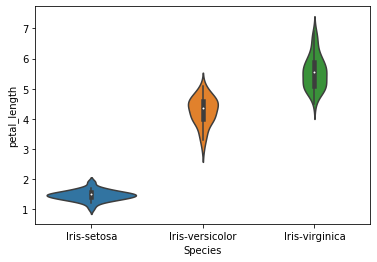

In [29]:
# A violin plot combines the benefits of PDF and box plot
# Denser region of the data are fatter and sparser ones are thinner in violin plot
sns.violinplot(x='Species', y='petal_length', data=iris)

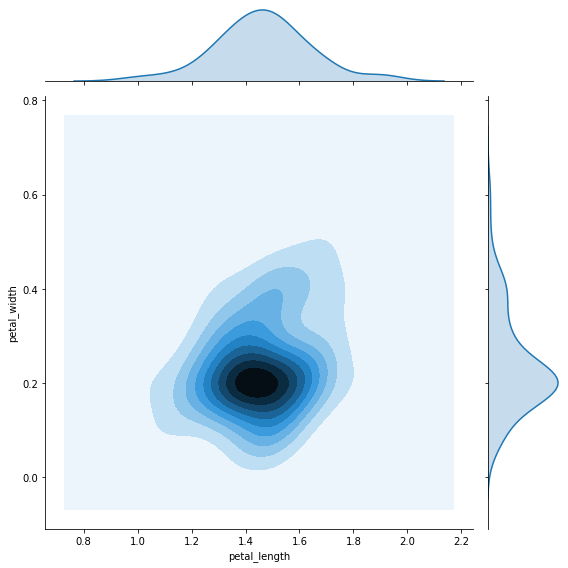

In [30]:
# 2 - Dimensional density plot
# Contour plot
sns.jointplot(x='petal_length', y='petal_width', data=iris_setosa, kind='kde', height=8)

In [31]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Spliting the data

In [33]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['Species']

# train test model

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

# Fitting the model

In [38]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
prediction = logmodel.predict(X_test)

# confusion matrix

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test, prediction)

array([[13,  0,  0],
       [ 0, 19,  1],
       [ 0,  0, 12]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

